In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ER-131] Homework 3: EDA Fire Incident Data
<br>

### Table of Contents
[Introduction](#intro)<br>
1 - [The IOU data](#data)<br>
2 - [Merging IOU and Weather Station Data](#merge)<br>
3 - [EDA](#eda)<br>
4 - [Exploring data through tables and visuals](#tables_plots)<br>
5 - [Summarizing data](#summarize)<br>

### Introduction <a id='intro'></a>

In this homework, you will investigate fire incident data from the three California Investor Owned Utilities (IOUs). The main goal for this assignment is to establish different ways to explore your data and its limitations, as well as ways to summarize and re-organize data.

We will accomplish this by utilizing exploratory data analysis (EDA) to analyze utility-reported data alongside weather data.

### Learning Objectives 

* Demonstrate your ability to work with different file types
* Merge dataframes and perform operations to add new columns
* Explain the structure, granularity, scope, temporality and faithfulness of different data
* Perform basic data cleaning operations

### Dependencies

**Question 0 (1 pt):** Import the NumPy, Pandas, matplotlib, and Geopandas packages using their common pseudonyms. 

In [2]:
# YOUR CODE HERE

In [3]:
# SOLUTION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
# Run this cell to import a few more packages.
!pip install pyogrio
import csv
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from IPython.display import display, Latex, Markdown
pd.set_option('display.max_columns', 36)

from shapely.geometry import Point

----
## Section 1: The IOU Data<a id='data'></a>

In this notebook, you'll be working with data from the [California Public Utilities Commission](https://www.cpuc.ca.gov/industries-and-topics/wildfires). The three California Investor-Owned Utilities – IOUs – (PG&E, SCE, and SDGE) are required to report fire incidents to the CPUC, along with certain characteristics of the fire and the electrical system in the area.

<br>**Question 1.1a (1 pt):** Look through the `data` folder and then read the Shapefile into this notebook using the geopandas library. The csvs were retrieved from the CPUC website, and the first (PG&E) was converted into a shapefile. 

Take a look at the arguments that are passed to the `read_file` function. First, we specify the file location. We also set  `index_col` to `False`.  This forces numbered indices. As an alternative, we could have passed a number to `index_col`; if we pass $n$ in, then Pandas uses the $n+1^{\text{st}}$ column of the csv as the index. 

In [ ]:
# YOUR CODE HERE
# TEMPLATE: pge = gpd.read_file(..., index_col=False, engine = 'pyogrio')


In [5]:
# SOLUTION
pge = gpd.read_file('data/pge_geo.shp', index_col=False, engine = 'pyogrio')

In [6]:
pge.columns

Index(['Utility Na', 'Fire Start', 'Fire Sta_1', 'Material a', 'Land Use a',
       'Fire Size', 'Suppressed', 'Suppressin', 'Utility Fa', 'Other Comp',
       'Voltage (V', 'Equipment', 'Type', 'Was There', 'Outage Dat',
       'Outage Tim', 'Suspected', 'Equipmen_1', 'Contact Fr', 'Facility C',
       'Contributi', 'Notes (Opt', 'geometry'],
      dtype='object')

Geopandas truncates column names that exceed 10 characters. Run the chunk below to replace the column names with their original names. 

In [7]:
# Run this cell
raw = pd.read_csv('data/PGE_FireIncidentData_2014-2019.csv')
names = list(raw.columns) + ['geometry'] # We added a geometry column to convert the csv data to a GeoDataFrame, so we also need to add the name of this column
# The GeoDataFrame no longer contains the lat/lon fields that the csv contains
names.remove('Latitude') 
names.remove('Longitude') 
pge.columns = names

In [8]:
pge.columns

Index(['Utility Name', 'Fire Start Date', 'Fire Start Time',
       'Material at Origin', 'Land Use at Origin', 'Fire Size',
       'Suppressed by', 'Suppressing Agency',
       'Utility Facility Identification', 'Other Companies', 'Voltage (Volts)',
       'Equipment Involved With', 'Type', 'Was There an Outage', 'Outage Date',
       'Outage Time', 'Suspected Initiating Event',
       'Equipment /Facility Failure', 'Contact From Object',
       'Facility Contacted', 'Contributing Factor', 'Notes (Optional):',
       'geometry'],
      dtype='object')

**Question 1.1b (1 pt):** What type of geometry are the objects in the `pge` GeoDataFrame?

In [ ]:
# scratch work here

*Your answer here*

In [9]:
# SCRATCH SOLUTION
print(type(pge.geometry[0]))

# Alternatively:
print(pge.geometry.geom_type.unique())

<class 'shapely.geometry.point.Point'>
['Point']


*SOLUTION*
Point.

**Question 1.2a (1 pt)** In our `data` folder, we have a Shapefile only for PG&E data, but we do have csvs for Southern California Edison (SCE) and San Diego Gas & Electric (SDGE) that contain Latitude and Longitude information. Read in those SCE and SDGE csvs in:

In [ ]:
# YOUR CODE HERE
sce_df = ...
sdge_df = ...

In [10]:
# SOLUTION
sce_df = pd.read_csv('data/SCE_FireIncidentData_2014-2019.csv')
sdge_df = pd.read_csv('data/SDGE_FireIncidentData_2014-2019.csv')

In [11]:
sce_df.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):
0,SCE,5/29/2014,18:00,33.903630,-118.038698,Other,Urban,Less Than .25 Acres,Fire Agency,Santa Fe Springs,"14051 Marquadt, Santa Fe",None,66kV,Other,Overhead,No,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN
1,SCE,6/5/2014,9:20,34.555046,-118.117789,Other,Rural,Less Than .25 Acres,Fire Agency,LA County,700 East Ave. S. Palmdale,None,12kV,Conductor,Overhead,No,NaN,NaN,Contact From Object,NaN,Other,Electric Facility,Unknown,NaN
2,SCE,6/8/2014,18:00,33.680885,-117.948719,Other,Urban,Less Than .25 Acres,Fire Agency,Huntington Beach,"19391, 19381, 19371, Pitc",None,12kV,Other,Overhead,No,NaN,NaN,Contact From Object,NaN,Balloons,Electric Facility,None,NaN
3,SCE,6/13/2014,13:00,35.715100,-118.511067,Vegetation,Rural,1000 - 4999 Acres,Fire Agency,Cal Fire,West of Lake Isabella & So,None,66kV,Other,Overhead,No,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN
4,SCE,6/18/2014,15:00,34.162642,-118.676722,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,LA County,Location of Fire 726730E C,None,16kV,Conductor,Overhead,Yes,6/18/2014,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN


In [12]:
sdge_df.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):
0,SDG&E,1/1/2014,18:45,33.1179,-117.0780,Vegetation,Urban,Less Than .25 Acres,Customer,NaN,P11112,NaN,12kV,Other,Overhead,Yes,1/1/2014,18:45,Equipment/Facility Failure,Splice/Clamp/Connector,NaN,NaN,Other,NaN
1,SDG&E,3/5/2014,9:49,33.2038,-117.1142,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,Cal Fire,P515262,NaN,12kV,Conductor,Overhead,Yes,3/12/2014,9:49,Equipment/Facility Failure,Splice/Clamp/Connector,NaN,NaN,NaN,NaN
2,SDG&E,4/15/2014,6:20,32.6778,-117.0460,Vegetation,Urban,Less Than .25 Acres,Fire Agency,S.D.F.D.,Z180434,NaN,12kV,Conductor,Overhead,No,NaN,NaN,Equipment/Facility Failure,Guy/Span Wire,NaN,NaN,None,NaN
3,SDG&E,4/17/2014,16:42,33.2203,-117.3380,Vegetation,Urban,Less Than .25 Acres,Fire Agency,OFD,TL23010,NaN,230kV,Conductor,Overhead,No,NaN,NaN,Contact From Object,NaN,Vehicle,Electric Facility,Human Error,NaN
4,SDG&E,4/27/2014,12:00,32.2415,-117.3470,Vegetation,Rural,Less Than .25 Acres,Utility,NaN,"TL 6912, Z122445",none,69kV,Other,Overhead,No,NaN,NaN,Equipment/Facility Failure,Other,NaN,NaN,None,NaN


**Question 1.2b (1 pt)** Check if the columns of these two pandas DataFrames are the same. Are they the same as the columns of the `pge` GeoDataFrame? (You can do this check by visually examining the column names, or you may find the [numpy.setdiff1d](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) method helpful) 

In [13]:
# scratch work here

*YOUR ANSWER HERE*

In [14]:
# SOLUTION scratch work 
# Confirm that sce_df and sdge_df columns are identical 
print((sce_df.columns == sdge_df.columns).all())
# Check sce/sdge diffs from pge
sce_diffs  = np.setdiff1d(sce_df.columns,pge.columns)
sdge_diffs = np.setdiff1d(sdge_df.columns,pge.columns)
print(sce_diffs)
print(sdge_diffs)

# Can also check that PGE doesn't have columns that aren't in SCE, SDGE: 
print(np.setdiff1d(pge.columns,sce_df.columns))

True
['Equipment Type' 'Latitude' 'Longitude']
['Equipment Type' 'Latitude' 'Longitude']
['Type' 'geometry']


*SOLUTION* 

*SCE and SDGE have the same columns. They have `['Equipment Type' 'Latitude' 'Longitude']` while PGE doesn't have `['Latitude' 'Longitude']` but has `['Type' 'geometry']`:*

Run the two chunks below to construct our new GeoDataFrames, `sce` and `sdge` from corresponding DataFrames (and note that in the process, we're choosing to drop the 'Longitude' and 'Latitude' fields from `sce_df` and `sdge_df`). 

In [15]:
# SCE
sce_geometry = [Point(xy) for xy in zip(sce_df.Longitude, sce_df.Latitude)]
sce_df = sce_df.drop(['Longitude', 'Latitude'], axis=1)
sce = gpd.GeoDataFrame(sce_df, crs="EPSG:4326", geometry=sce_geometry)

In [16]:
# SDGE
sdge_geometry = [Point(xy) for xy in zip(sdge_df.Longitude, sdge_df.Latitude)]
sdge_df = sdge_df.drop(['Longitude', 'Latitude'], axis=1)
sdge = gpd.GeoDataFrame(sdge_df, crs="EPSG:4326", geometry=sdge_geometry)

In [17]:
print(type(sce))
print(type(sdge))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


**Question 1.3a (1pt)** When we examine the values for the `Equipment Type` or `Type` columns in `pge`, `sce`, and `sdge` where they appear, it seems that these column names indicate the same type of information. In whichever of the `pge`, `sce`, or `sdge` GeoDataFrames in which the `Type` column appears, let's rename it to the more specific column name `Equipment Type` for consistency across GeoDataFrames. 

In [18]:
# YOUR CODE HERE


In [19]:
# SOLUTION
pge.rename(columns = {"Type":"Equipment Type"}, inplace = True) # rename data column

In [20]:
assert sdge.columns.all() == sce.columns.all() == pge.columns.all()
assert len(sce.columns) == 23

**Question 1.3b (1 pt):** What type of geometry are the objects in the `pge`, `sce`, and `sdge` GeoDataFrames?

In [21]:
# scratch work here

*YOUR ANSWER HERE*

In [22]:
# Solution scratch work 
print(type(pge.geometry[0]))
assert type(pge.geometry[0]) == type(sce.geometry[0])
assert type(pge.geometry[0]) == type(sdge.geometry[0])

# Alternatively:
print(pge.geometry.geom_type.unique())
print(sce.geometry.geom_type.unique())
print(sdge.geometry.geom_type.unique())

<class 'shapely.geometry.point.Point'>
['Point']
['Point']
['Point']


*SOLUTION*

Points.

Let's plot the three IOU datasets on the same map to get a sense of where the data lie.

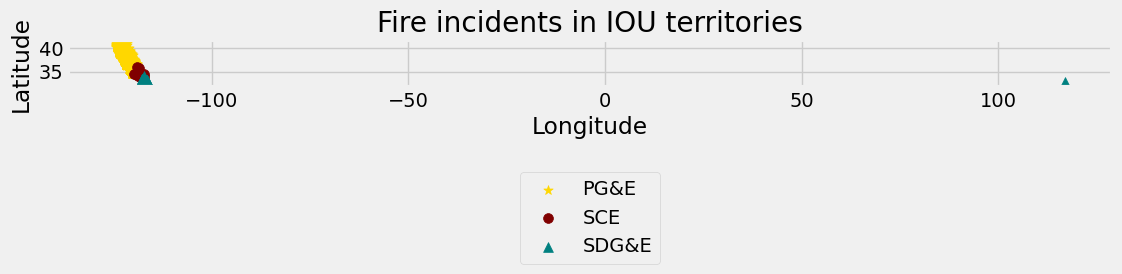

In [23]:
# Run this cell
fig, ax = plt.subplots(figsize = (12,8))
pge.plot(ax = ax, label = 'PG&E', color = 'gold', marker = '*', markersize = 50)
sce.loc[1:10].plot(ax = ax, label = 'SCE', color = 'maroon', marker = 'o', markersize = 50)
sdge.plot(ax = ax, label = 'SDG&E', color = 'teal', marker = '^', markersize = 50)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -4))
plt.title('Fire incidents in IOU territories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();

Uh oh! Looks like something is wrong with some of our data.

**Question 1.4a (1 pt):** Examine the graph carefully and describe a possible data error that is leading to the unexpected output of our map. 

*YOUR ANSWER HERE*

*SOLUTION*


*It appears that the coordinates of some data points in the SDG&E data are incorrect. California is situated between approximately -124 and -116 degrees West, but at least one data points fall at 0 degrees or higher.*

**Question 1.5a (1 pt):** The most extreme latitude and longitude points in California are approximately as follows: 
* North: 42.0095 
* East -114.1312 
* South: 32.5341
* West: -124.4096 
 

Fill in the ellipses below to identify any points in the three utility Geodataframes that fall outside of California. Note: the pipe | symbol is the equivalent of an "or" statement. In other words, the `.loc` function in the code block below is filtering the `sdge` GeoDataFrame if *any* of the four specified criteria are true.


In [ ]:
sdge.loc[(sdge.geometry.y > ...) | # Fill in the ellipses to check that no points fall above the northernmost boundary, or...
         (sdge.geometry.x > ...) | # ...to the right of the easternnmost boundary, or...
         (sdge.geometry.y < ...) |  # ... below the southernmost boundary, or...
         (sdge.geometry.x < ...)]   # ... to the left of the westernmost boundary.

In [ ]:
# Repeat this process for PG&E...
pge.loc[...]

In [ ]:
# ... and for SCE.
sce.loc[...]

In [24]:
# SOLUTION (SDGE)
sdge.loc[(sdge.geometry.y > 42.0095) | # Fill in the ellipses to check that no points fall above the northernmost boundary, or...
         (sdge.geometry.x > -114.1312) | # ...to the right of the easternnmost boundary, or...
         (sdge.geometry.y < 32.5341) |  # ... below the southernmost boundary, or...
         (sdge.geometry.x < -124.4096)]   # ... to the left of the westernmost boundary.

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry
4,SDG&E,4/27/2014,12:00,Vegetation,Rural,Less Than .25 Acres,Utility,NaN,"TL 6912, Z122445",none,69kV,Other,Overhead,No,NaN,NaN,Equipment/Facility Failure,Other,NaN,NaN,None,NaN,POINT (-117.34700 32.24150)
20,SDG&E,7/22/2014,10:25,Vegetation,Rural,Less Than .25 Acres,Fire Agency,Cal Fire,P276288,AT&T,12kV,Conductor,Overhead,No,NaN,NaN,Contact From Object,NaN,Vehicle,Electric Facility,Outside Force,NaN,POINT (116.84550 32.78990)
46,SDG&E,8/23/2015,15:00,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,CAL FIRE,P415300,NaN,12kV,Conductor,Overhead,Yes,8/23/2015,15:00,Contact From Object,NaN,Vegetation,Electric Facility,Weather,NaN,POINT (-117.15210 32.27291)


In [25]:
# SOLUTION (PGE)
pge.loc[(pge.geometry.y > 42.0095) | # Fill in the ellipses to check that no points fall above the northernmost boundary, or...
         (pge.geometry.x > -114.1312) | # ...to the right of the easternnmost boundary, or...
         (pge.geometry.y < 32.5341) |  # ... below the southernmost boundary, or...
         (pge.geometry.x < -124.4096)]   # ... to the left of the westernmost boundary.

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry


In [26]:
# SOLUTION (SCE)
sce.loc[(sce.geometry.y > 42.0095) | # Fill in the ellipses to check that no points fall above the northernmost boundary, or...
         (sce.geometry.x > -114.1312) | # ...to the right of the easternnmost boundary, or...
         (sce.geometry.y < 32.5341) |  # ... below the southernmost boundary, or...
         (sce.geometry.x < -124.4096)]   # ... to the left of the westernmost boundary.

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry


**Question 1.5b (1 pt):** How many points fall outside California's boundaries for each of the three ignition datasets?

*YOUR ANSWER HERE*

SDGE:

PGE:

SCE:

*SOLUTION*

SDGE: 3

PGE: 0

SCE: 0

**Question 1.5c (1 pt):** For the sake of expediency, `drop` the extraneous points identified in Question 1.4 from their respective GeoDataFrames (better alternatives could be to research each of these fires and manually correct the location, or replace the point coordinates with null values). Make sure to specify the `labels`, `axis`, and `inplace` parameters correctly. You should not rename the dataframe.

In [27]:
# YOUR CODE HERE

In [28]:
#SOLUTION
sdge.drop(labels = [4,20,46], axis = 0, inplace = True)

In [29]:
assert len(sdge) == 159
assert len(pge) == 1986
assert len(sce) == 577

Let's try our plot again.

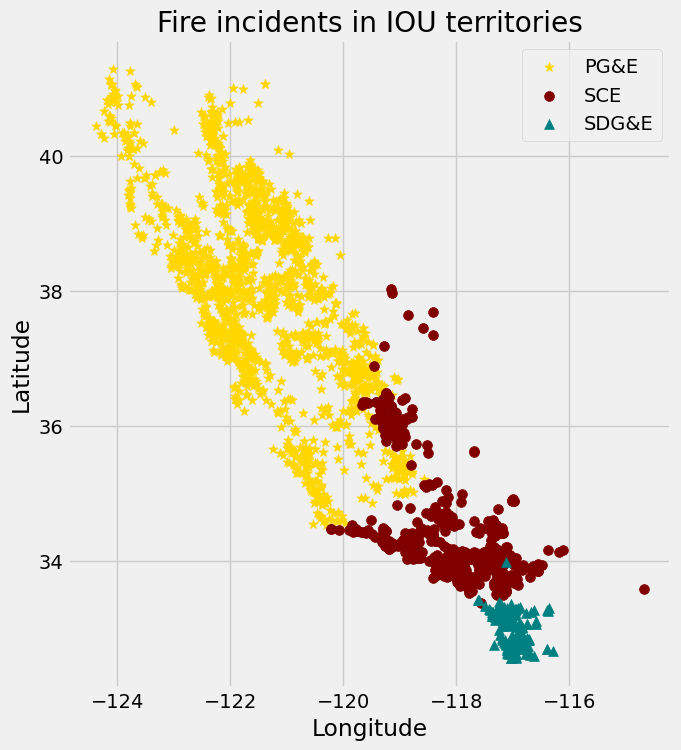

In [30]:
# Run this cell
fig, ax = plt.subplots(figsize = (12,8))
pge.plot(ax = ax, label = 'PG&E', color = 'gold', marker = '*', markersize = 50)
sce.plot(ax = ax, label = 'SCE', color = 'maroon', marker = 'o', markersize = 50)
sdge.plot(ax = ax, label = 'SDG&E', color = 'teal', marker = '^', markersize = 50)
plt.title('Fire incidents in IOU territories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Much better!

## Section 2: Merging IOU and Weather Station Data<a id='merge'></a>

We'll also be working with weather data from the National Oceanic and Atmospheric Administration (NOAA). [Daily Summary Data](https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND) were obtained for one land-based weather station per IOU service area from January 2014 to December 2019. 

**Question 2.1 (1 pt)**: Load the file `noaa_dailysummary.csv` into a Pandas dataframe.

In [31]:
# YOUR CODE HERE

In [32]:
# Solution
weather = pd.read_csv("data/noaa_dailysummary.csv")

In [33]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2014-01-01,3.58,0.0,56,64,46
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2014-01-02,4.92,0.0,61,78,50
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2014-01-03,3.80,0.0,57,64,47
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2014-01-04,4.03,0.0,56,65,50
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2014-01-05,4.03,0.0,59,76,47


We're going to be merging fire incident data between each IOU and a land-based weather station in that IOU's service area. There are three weather stations in the dataframe `weather`, as shown in the output below. 'SAN DIEGO INTERNATIONAL AIRPORT, CA US' is in SDG&E's service area, 'SACRAMENTO AIRPORT ASOS, CA US' is in PG&E's service area, and 'LOS ANGELES INTERNATIONAL AIRPORT, CA US' is in SCE's service area. <br>

In [34]:
weather["NAME"].unique() # look at weather station values

array(['LOS ANGELES INTERNATIONAL AIRPORT, CA US',
       'SACRAMENTO AIRPORT ASOS, CA US',
       'SAN DIEGO INTERNATIONAL AIRPORT, CA US'], dtype=object)

**Question 2.2 (1 pt)** Since we're going to use the `merge()` function, we want the fields (i.e., columns) that we merge on to have the same name. Both the IOU and weather station data have a field for date, but these columns have different names between the two datasets. Rename the "Fire Start Data" column in `sdge`, `pge`, and `sce` to match the "DATE" column in the `weather` dataframe using the function `.rename()`. Set the `inplace` parameter so that you do not have to reassign the dataset to a new name.

In [35]:
# YOUR CODE HERE

In [36]:
# SOLUTION

for df in [sdge,pge,sce]:
    df.rename(columns = {"Fire Start Date":"DATE"}, inplace = True) # rename data column

Finally, run the code below to convert the data type of all the date columns to `datetime`.<br>

In [37]:
#Run this cell
for df in [pge, sce, sdge, weather]: # change date data type to datetime
    df["DATE"] = pd.to_datetime(df["DATE"], errors = "coerce")

**Question 2.3 (1 pt)**: Create three new dataframes - `weather_sdge`, `weather_pge`, and `weather_sce` - that correspond to just the weather data in that IOU's service area. (Hint: the `str_contains` method might come in handy.)

In [ ]:
# Replace ellipses with your code
weather_sdge = ...
weather_pge = ...
weather_sce = ...

In [38]:
# SOLUTION
weather_sdge = weather[weather["NAME"].str.contains("SAN DIEGO")]
weather_pge = weather[weather["NAME"].str.contains("SACRAMENTO")]
weather_sce = weather[weather["NAME"].str.contains("LOS ANGELES")]

In [39]:
assert len(weather_sdge) == len(weather_pge) == len(weather_sce) == 2191

**Question 2.4 (1 pt)**: Merge each utility's fire incident and weather data and save the merged dataframes as `sdge_fireweather`, `pge_fireweather`, and `sce_fireweather`. The data should be merged on the date fields. 

In [ ]:
# Replace ellipses with your code
pge_fireweather = ...
sce_fireweather = ...
sdge_fireweather = ...

In [40]:
# SOLUTION
pge_fireweather = pge.merge(weather_pge, on = "DATE")
sce_fireweather = sce.merge(weather_sce, on = "DATE")
sdge_fireweather = sdge.merge(weather_sdge, on = "DATE")

**Question 2.5 (1 pt):** What type of merge did you use in Question 2.4 (inner, outer, left, right)? Why did you choose this type?

*YOUR ANSWER HERE*

*If your goal is to analyze the weather conditions on days when fires started, an "inner" merge would guarantee you only end up with the dates that are common to both the IOU and weather station data. Since the IOU data have a more limited number of date records than do the weather data, you could also use a left or right merge depending on how you set up the function. An outer merge would retain all the IOU and all the weather records even if they didn't overlap.*

In [41]:
assert pge_fireweather.shape[1] == sce_fireweather.shape[1] == sdge_fireweather.shape[1] == 30

**Question 2.6 (1 pt):** Compare the number of records in the merged `_fireweather` dataframes to the original `pge`, `sce`, and `sdge` dataframes. Did you lose any records when you performed the merge? Why or why not?

In [42]:
#scratch work here

*YOUR ANSWER HERE*

In [43]:
# SOLUTION scratch work
print(sce.shape)
print(sce_fireweather.shape)
print(sdge.shape)
print(sdge_fireweather.shape)
print(pge.shape)
print(pge_fireweather.shape)
sdge[sdge['DATE'].isnull()]

(577, 23)
(577, 30)
(159, 23)
(154, 30)
(1986, 23)
(1986, 30)


,Utility Name,DATE,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry
71,SDG&E,NaT,0.435417,Vegetation,Urban,Less Than .25 Acres,Customer,NaN,P228931 C 520,NaN,12kv,Conductor,Overhead,Yes,42562,0.435417,Contact From Object,NaN,Other,Electric Facility,NaN,NaN,POINT (-117.18257 33.27186)
72,SDG&E,NaT,Unknown,Vegetation,Rural,Less Than .25 Acres,Fire Agency,Unknown,"Z29145 (TL 690, C198)",NaN,12kV,Conductor,Overhead,Yes,42476,NaN,Wind/Equipment/Facility Failure,NaN,NaN,NaN,Weather,NaN,POINT (-117.36827 33.22433)
73,SDG&E,NaT,0.453472,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,Valley Center,Z811329,NaN,230kv,Conductor,Overhead,No,NaN,NaN,Contact From Object,NaN,Other,Electric Facility,Other,NaN,POINT (-117.09742 33.30186)
85,SDG&E,NaT,0.253472,Vegetation,Rural,Less Than .25 Acres,Fire Agency,CALFIRE,P370041,AT&T,12kV,Conductor,Overhead,Yes,42535,0.253472,Contact From Object,NaN,Vehicle,Pole,Outside Force,NaN,POINT (-116.90510 32.88015)
88,SDG&E,NaT,unknown,Vegetation,Rural,Less Than .25 Acres,Fire Agency,CALFIRE,NaN,NaN,12kV,Fuse,Overhead,No,NaN,NaN,Contact From Object,NaN,NaN,NaN,Unknown,NaN,POINT (-117.20794 33.29666)


*SOLUTION*


*An "inner" merge would have eliminated five records from the SDGE dataframe. This is because there was an imperfect overlap between the dates in the SDGE fire data and the weather station data. In this case, five of the fire records has a null date (NaT).*

Before combining data from all three IOUs, we'll run the following `assert` statements to make sure that the column names are the same across the three dataframes.

*Note*: because the reporting is standardized for these IOUs, and because of some Excel cleaning that was done beforehand, the column names should match up. But if you're working with a dataset where column names need to be changed, you can use the [`rename` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) or a value assigment (e.g., `sdge_fireweather.columns = sce_fireweather.columns` would set the columns of `sdge_fireweather` to be the same as those in `sce_fireweather`, as long as you were certain that the columns represented the same values).

In [44]:
assert all(pge_fireweather.columns == sce_fireweather.columns)
assert all(sce_fireweather.columns == sdge_fireweather.columns)

Now, we can use [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) to combine all three dataframes into one, called `alliou`. Run the cell below to combine the three IOU dataframes. We want our new dataframe `alliou` to renumber the indices (otherwise we'd have three rows with row index = 0, three rows with row index = 1, etc.). Check the [`concat()` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) and make sure that we've set the appropriate argument to achieve this.

In [45]:
alliou = pd.concat([pge_fireweather,sce_fireweather,sdge_fireweather], ignore_index = True)

In [46]:
alliou.head()

,Utility Name,DATE,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,PG&E,2014-06-10,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,NaN,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",8.05,0.0,83,103,60
1,PG&E,2014-06-12,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,POINT (-122.74624 38.04375),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",10.96,0.0,65,82,54
2,PG&E,2014-06-13,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,POINT (-121.38855 36.93348),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",5.82,0.0,68,87,55
3,PG&E,2014-06-14,8:47,Vegetation,Rural,< 3 meters,Unknown,NaN,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,POINT (-122.18077 37.41900),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",7.83,0.0,74,87,57
4,PG&E,2014-06-14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,POINT (-121.09192 37.13092),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",7.83,0.0,74,87,57


In [47]:
assert alliou.shape[0] > 2500
assert all(iou in alliou["Utility Name"].unique() for iou in ["PG&E", "SCE", "SDG&E"])

## Section 3: EDA<a id='eda'></a>

**Question 3.1 (5 pts):** 
Analyze the `alliou` table and see what data types are within the table. 
<br>What is the:
1. structure of the data?<br>
2. granularity of the data?<br>
3. scope of the data?<br>
4. temporality of the data?<br>
5. faithfulness of the data?<br>

Some questions to ask yourself:
* Structure - What was the format or file type of the imported data? Are there are any differences in data types between the individual IOU dataframes, the weather dataframe, and the combined dataframe?
* Granularity - What does each row of data represent? Do any of the fields represent aggregated data (data that is reduced or summarized in some way)? What's the resolution in time (eg. hourly, monthly) of the data?
* Scope - You can think of scope in different dimensions, but geographic scope and temporal scope is one place to start. Is the temporal scope the same for all three utilities?
* Temporality - What do the dates and times represent?
* Faithfulness - Where do the data come from? Is there any reason to question it? Where do you find null values? How have the manipulations we have conducted in this notebook revealed (and impacted) faithfulness?

Please make at least two observations for each category (structure, granularity, etc). The [NOAA's Daily Summary Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) might be a helpful resource.

*YOUR ANSWER HERE*

*SOLUTION*


*We won't include a detailed answer here, but two (accurate and relevant) observations for each category should give you full points. Answers should refer to both IOU data and weather data.*

**Question 3.2 (1 pt)**: To get a basic estimate of weather conditions on the day of the fire incident, we use daily summaries from one weather station in the service area of each IOU. This approach isn't particularly granular - the IOU datasets provide more detail both in terms of location and time than the weather data that we are using. Let's say you wanted to refine this approach to more effectively uncover the weather conditions as close as possible to the location and time of the fire incident. In a few sentences, qualitatively describe an alternative approach. <br>

You don't have to specify any code or functions, but you should reference which columns you would use (either in the IOU or weather datasets) and which datasets you would use - you can take a look at [available NOAA data here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets).

*YOUR ANSWER HERE*

*SOLUTION*


*Many answers are possible, but students should talk about how they would match between data sets both in space and in time (eg. using the NOAA's hourly data and getting data from multiple land-based stations and matching on the closest latitude and longitude would be one approach).*

**Question 3.3 (2 pts):** What are the unique `Fire Size` categories in the `alliou` table? Describe any redundancies or ambiguities in how the fire sizes are bucketed.

In [48]:
# Scratch work here

In [49]:
# Solution scratch

size_unique = alliou['Fire Size'].unique()
size_unique

array(['< 0.25 Acres', '10 - 99 Acres', '< 3 meters', '.26 - 9.99 Acres',
       'Structure Only', '1000 - 4999 Acres', '300 - 999 Acres',
       '100 - 299 Acres', '< 3 Meters', '> 5000 Acres',
       'Less Than .25 Acres', 'Greater than 5000 Acres'], dtype=object)

*YOUR ANSWER HERE*

*The unique `Size` categories are shown above, saved as array `size_unique`. There are redundancies in how the fire sizes were bucketed/entered. For example, '< 0.25 Acres' and 'Less Than .25 Acres' represent the same value, as do '< 3 meters' and '< 3 Meters.' Some of the categories such as 'Other' and 'Structure Only' are unclear in whether they refer to area or how large that area might be.*

----
## Section 4: Exploring data through tables and visuals<a id='tables_plots'></a>

In this section, we'll do some data cleaning with the objective of exploring the fire incident data.


**Question 4.1 (2 pts)**: Use `pd.value_counts()` to get the number of reported fire incidents by utility. Why might some fires (e.g., the Mendocino Lake Complex) not be associated with PG&E, SCE, or SDG&E? What are some factors that could explain the differences in number of reports between PG&E and SCE?

In [ ]:
# YOUR CODE HERE

In [50]:
# Solution
pd.value_counts(alliou['Utility Name'])

# pd.pivot_table(alliou,index='Utility Name',columns='Fire Size',values='DATE',aggfunc='count')

PG&E     1986
SCE       577
SDG&E     154
Name: Utility Name, dtype: int64

*YOUR ANSWER HERE*

*SOLUTION*


*The complexes were very large fires that may have spanned more than one utility's service area (in addition to the three IOUs, several publicly owned -- often municipal -- utilities also operate in CA, and some of these smaller utilities may have had territory that was impacted by the complex fires). Across 2014-2018, despite being a shorter time span than 2014-2019 for the other two service areas, PG&E consistently has many more incidents than SCE or SDG&E. SDG&E has a smaller service area, but PG&E and SCE have comparable service areas. Some of the factors that influence the high number of incidents that PG&E have might be a higher amount of vegetation in their service area or a higher number of overhead lines.*

We might be interesting in understanding the seasonality of fires (i.e., when in the year fires occur) across the three IOU territories. Let's use the Pandas datetime functionality to add a column to the `alliou` called `day_of_year`. 

In [51]:
# Run this cell
alliou['day_of_year'] = alliou['DATE'].dt.dayofyear
alliou.head()

,Utility Name,DATE,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN,day_of_year
0,PG&E,2014-06-10,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,NaN,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",8.05,0.0,83,103,60,161
1,PG&E,2014-06-12,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,POINT (-122.74624 38.04375),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",10.96,0.0,65,82,54,163
2,PG&E,2014-06-13,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,POINT (-121.38855 36.93348),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",5.82,0.0,68,87,55,164
3,PG&E,2014-06-14,8:47,Vegetation,Rural,< 3 meters,Unknown,NaN,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,POINT (-122.18077 37.41900),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",7.83,0.0,74,87,57,165
4,PG&E,2014-06-14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,POINT (-121.09192 37.13092),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",7.83,0.0,74,87,57,165


**Question 4.2 (1 pt):** View the plots below with three histograms showing the number of fires that occur across the days of the year. Review the code for how to plot multiple plots within a single figure, to ensure that you could do this yourself. Using the plots below, describe how the seasonality of fires compares across the three IOU territories.

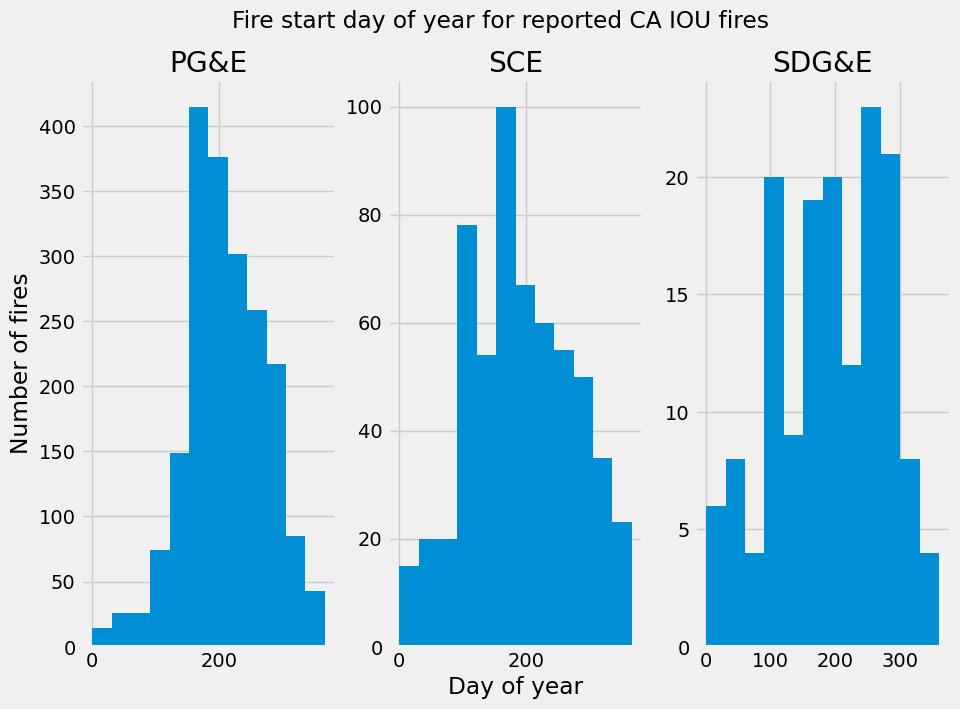

In [53]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(10,7))
ax0.hist(alliou.loc[alliou['Utility Name']=='PG&E']['day_of_year'],bins=12)
ax0.set_title('PG&E')
ax0.set_ylabel('Number of fires')

ax1.hist(alliou.loc[alliou['Utility Name']=='SCE']['day_of_year'],bins=12)
ax1.set_title('SCE')
ax1.set_xlabel('Day of year')

ax2.hist(alliou.loc[alliou['Utility Name']=='SDG&E']['day_of_year'],bins=12)
ax2.set_title('SDG&E')

plt.suptitle('Fire start day of year for reported CA IOU fires');

*YOUR OBSERVATIONS HERE*

*EXAMPLE SOLUTION*

*In PG&E's territory, fire season season appears to peak around the middle of the year (June) and last through October, with relatively few fires Oct-May. By comparison, SCE's fire season is longer, with relatively many ignitions from April through December. SDG&E's fire season remains relatively high between April and October.*

**Question 4.3 (2 pts)**: Below, you will fill in the missing arguments to create a table showing the number of outage incidents associated with each type of material at the origin of the fire. Your table should have two columns ("no" and "yes") indicating whether there was an outage, and three rows ("Building", "Other", and "Vegetation") representing the material at origin types. It may help to look at the [documentation for `pd.pivot_table`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

In [ ]:
# Examining the data
print(alliou["Was There an Outage"].unique())

# Cleaning the data
alliou["Was There an Outage"] = alliou["Was There an Outage"].str.lower()
alliou["Material at Origin"] = alliou["Material at Origin"].str.lower()

# Pivot Table
pd.pivot_table(
    data = alliou, 
    values= 'DATE', 
    index = ...,    # YOUR CODE HERE
    columns = ...,  # YOUR CODE HERE
    aggfunc='count'
)

In [ ]:
# SOLUTION
# Examining the data
print(alliou["Was There an Outage"].unique())

# Cleaning the data
alliou["Was There an Outage"] = alliou["Was There an Outage"].str.lower()
alliou["Material at Origin"] = alliou["Material at Origin"].str.lower()

# Pivot Table
pd.pivot_table(
    data = alliou, 
    values= 'DATE', 
    index = 'Material at Origin', 
    columns = 'Was There an Outage', 
    aggfunc='count'
)

<br>

----

## Section 5. Summarizing data<a id='summarize'></a>

One of the CPUC's goals when collecting this data is to identify operational and environmental trends related to fire incidents, with the objective of improving regulations and internal standards for utilities. In this section, you'll create two new dataframes: one that summarizes fire incident data by material at origin, and another that summarizes weather data by year. In the process, you'll gain more experience with using `.groupby()` along with summarizing data that is non-numerical or doesn't lend itself as well to `.groupby()`. 
<br>

**Question 5.1 (1 pt):** Define a new dataframe, `alliou_eqp`, that contains a single column containing every unique value for `Equipment Involved With` (this field refers to equipment involved with a fire ignition). Combine the conductor categories, and recategorize entries in the "None" category as "Unknown."

In [ ]:
# YOUR CODE HERE

# First, make a column in alliou for the cleaned equipment data.
# For the moment, we'll just copy the data from the "Equipment Involved With Ignition" column
alliou['Equipment_cleaned'] = alliou['Equipment Involved With']

# Fill in the ellipses to make sure there is only one category for conductors
alliou.loc[alliou['Equipment Involved With']==...,'Equipment_cleaned'] = ...

# Fill in the ellipses to recategorize "None" entries as "Unknown"
alliou.loc[alliou['Equipment Involved With'].isnull(),'Equipment_cleaned'] = ...

# Create a dataframe with one column
alliou_eqp = pd.DataFrame()
alliou_eqp["Equipment"] = ...

alliou_eqp

In [55]:
# SOLUTION
# First, make a column in alliou for the cleaned equipment data.
# For the moment, we'll just copy the data from the "Equipment Involved With Ignition" column
alliou['Equipment_cleaned'] = alliou['Equipment Involved With']

# Fill in the ellipses to make sure there is only one category for conductors
alliou.loc[alliou['Equipment Involved With']=='conductor','Equipment_cleaned'] = 'Conductor'

# Fill in the ellipses to recategorize "None" entries as "Unknown"
alliou.loc[alliou['Equipment Involved With'].isnull(),'Equipment_cleaned'] = 'Unknown'

# Create a dataframe with one column
alliou_eqp = pd.DataFrame()
alliou_eqp["Equipment"] = alliou["Equipment_cleaned"].unique()

alliou_eqp

,Equipment
0,Conductor
1,Capacitor Bank
2,Transformer
3,Other
4,Unknown
5,Fuse
6,Lightning Arrestor
7,Switch
8,Meter


In [56]:
assert len(alliou_eqp)==9

**Question 5.2 (1 pt):** The first set of values that we want to add to the dataframe is a count of the total number of fire incidents associated with each equipment category. Start by using `groupby().size()` to get a count of records for each equipment type and save it to variable `counts`.

In [ ]:
counts = ... # YOUR CODE HERE

In [57]:
# Solution
counts = alliou.groupby(["Equipment_cleaned"]).size()

In [58]:
counts

Equipment_cleaned
Capacitor Bank          56
Conductor             2298
Fuse                    45
Lightning Arrestor      36
Meter                    1
Other                  124
Switch                  26
Transformer             97
Unknown                 34
dtype: int64

**Question 5.3** (1 pt): Now we want to put the values from `counts` into a new column in dataframe `alliou_eqp`. Name this new column "Ignition Count." Do this below, making sure the right values from `counts` map to the correct equipment types. The resulting `alliou_eqp` dataframe should have two columns, one for equipment and one for the count of fire incidents.<br>

In [59]:
# YOUR CODE HERE

In [60]:
# Solution

# there are a lot of ways to do this - but since the equipment in counts is sorted alphabetically, 
# I'm going to sort the material names in the dataframe as well and then add the values
alliou_eqp.sort_values(by = ["Equipment"], inplace = True)
alliou_eqp["Ignition Count"] = counts.values

# NOTE: for this question and the next, answers that hard-coded the values into the dataframe 
# (eg. alliou_matl["Ignition count"] = [33, 95, ...]) did not receive full marks

In [61]:
alliou_eqp

,Equipment,Ignition Count
1,Capacitor Bank,56
0,Conductor,2298
5,Fuse,45
6,Lightning Arrestor,36
8,Meter,1
3,Other,124
7,Switch,26
2,Transformer,97
4,Unknown,34


**Question 5.4 (1 pt)** Next, we want to find out what percentage of fire incidents involving each type of equipment are associated with outages. Add a column called "% Outage" to `alliou_eqp` that provides this value. There are lots of ways to approach finding the percentage of fire incidents associated with outages per material type, but some helpful functions might be `pivot_table()`, `groupby()` and `np.divide()`.

In [ ]:
#YOUR CODE HERE

... 

alliou_eqp["% Outage"] = ...

alliou_eqp

In [62]:
# SOLUTION
# get a count for number of outages per equipment type
outages_df = pd.pivot_table(alliou,values='DATE',index='Equipment_cleaned',columns='Was There an Outage',aggfunc='count')
outages_df['yes'][outages_df['yes'].isnull()] = 0
outage_counts = outages_df['yes']

alliou_eqp["% Outage"] = np.divide(outage_counts.values,alliou_eqp["Ignition Count"])*100

alliou_eqp

,Equipment,Ignition Count,% Outage
1,Capacitor Bank,56,57.142857
0,Conductor,2298,89.077459
5,Fuse,45,80.000000
6,Lightning Arrestor,36,72.222222
8,Meter,1,0.000000
3,Other,124,67.741935
7,Switch,26,88.461538
2,Transformer,97,80.412371
4,Unknown,34,58.823529


**Question 5.5 (2 pts)**: You're working for the CPUC, and as you're exploring the fire incident data a colleague notices that 88% of fire incidents involving switches are associated with outages. Your colleague concludes that a major focus of the commission should be to work with utilities to inspect and replaces switches in the utility territory. Do you agree with your colleague? Why or why not? Is there any additional data that you would want to collect before deciding where to focus maintenance review efforts? <br>

*YOUR ANSWER HERE*

*SOLUTION*


*There are many acceptable answers here, but students should answer the first two questions (if they agree and why/why not), discuss data limitations (potentially discussing the small sample size of switch-related incidents or missing information like the number of affected customers in each outage), and discuss additional data collection.*

**Question 5.6 (1 pt)** We'd also like to continue to explore seasonal trends. To start off, create a new column in `alliou` called "Fire Start Month" that includes the year of the fire incident (the `.dt.month` method is helfpul here).

In [ ]:
# YOUR CODE HERE

alliou["Fire Start Month"] = ...

In [63]:
# Solution

alliou["Fire Start Month"] = alliou["DATE"].dt.month

In [64]:
alliou.head()

,Utility Name,DATE,Fire Start Time,Material at Origin,Land Use at Origin,Fire Size,Suppressed by,Suppressing Agency,Utility Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With,Equipment Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes (Optional):,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN,day_of_year,Equipment_cleaned,Fire Start Month
0,PG&E,2014-06-10,15:14,vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,NaN,"12,000",Conductor,Overhead,yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",8.05,0.0,83,103,60,161,Conductor,6
1,PG&E,2014-06-12,6:30,vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,POINT (-122.74624 38.04375),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",10.96,0.0,65,82,54,163,Conductor,6
2,PG&E,2014-06-13,9:19,vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,POINT (-121.38855 36.93348),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",5.82,0.0,68,87,55,164,Conductor,6
3,PG&E,2014-06-14,8:47,vegetation,Rural,< 3 meters,Unknown,NaN,100275552,AT&T,"12,000",Conductor,Overhead,yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,POINT (-122.18077 37.41900),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",7.83,0.0,74,87,57,165,Conductor,6
4,PG&E,2014-06-14,11:01,vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,POINT (-121.09192 37.13092),USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",7.83,0.0,74,87,57,165,Conductor,6


**Question 5.7 (1 pt)** Filter the alliou dataframe so that it only includes PG&E, SCE, and SDG&E in the `Utility Name` column. Then, use `.groupby()` to create a dataframe called `alliou_month` that shows *average* weather data values for each month and utility. To do so, you'll need to give `.groupby()` two arguments in the form of a list.<br>

*Note*: You'll notice that the dataframe `alliou_month` will only provide grouped data for the weather-related variables (and the day_of_year column we added earlier), since none of the variables in the IOU dataset are stored as numbers (and so we can't calculate their mean).

In [ ]:
# Create a dataframe that includes only PG&E, SCE, and SDG&E
IOUs_only = ...

# Use groupby to show average weather data by month and utility
alliou_month = ...

In [65]:
# Solution

IOUs_only = alliou.loc[alliou['Utility Name'].isin(['PG&E','SCE','SDG&E'])]

alliou_month = IOUs_only.groupby(["Fire Start Month", "Utility Name"]).mean(numeric_only=True)

In [66]:
alliou_month

AWND      PRCP       TAVG       TMAX  \
Fire Start Month Utility Name                                             
1                PG&E          4.682143  0.225000  49.357143  59.285714   
                 SCE           5.905333  0.196667  58.333333  66.400000   
                 SDG&E         7.350000  0.194286  57.571429  64.142857   
2                PG&E          6.299615  0.220000  54.500000  65.538462   
                 SCE           6.028500  0.015000  61.100000  71.900000   
                 SDG&E         3.802857  0.007143  63.285714  74.714286   
3                PG&E          4.491600  0.004400  58.800000  72.200000   
                 SCE           7.617000  0.032500  61.600000  70.250000   
                 SDG&E         5.590000  0.037500  62.750000  68.250000   
4                PG&E          7.412222  0.037222  61.805556  75.083333   
                 SCE           9.578611  0.001528  63.055556  71.708333   
                 SDG&E         5.972000  0.000000  65.200000  74.150000   
5                PG&E          7.810470  0.011812  65.872483  80.906040   
                 SCE           8.241552  0.011034  62.155172  69.137931   
                 SDG&E         7.112000  0.003000  68.700000  76.100000   
6                PG&E          6.696658  0.001262  74.428218  92.321782   
                 SCE           7.862353  0.000098  65.372549  71.686275   
                 SDG&E         6.647222  0.000000  67.500000  73.666667   
7                PG&E          6.869583  0.000078  76.213542  94.638021   
                 SCE           7.969375  0.002969  71.140625  78.218750   
                 SDG&E         6.302174  0.000000  71.347826  77.130435   
8                PG&E          6.295820  0.000000  74.057878  91.913183   
                 SCE           7.474127  0.000317  70.904762  77.904762   
                 SDG&E         5.957273  0.000000  74.727273  81.272727   
9                PG&E          5.280664  0.003906  72.054688  89.140625   
                 SCE           7.345818  0.001091  72.290909  80.800000   
                 SDG&E         5.620833  0.000000  73.583333  80.916667   
10               PG&E          5.879495  0.024541  65.477064  80.577982   
                 SCE           6.639600  0.005200  69.860000  80.080000   
                 SDG&E         4.191579  0.050526  72.842105  84.157895   
11               PG&E          3.701548  0.046548  53.000000  65.630952   
                 SCE           6.039429  0.047714  63.971429  73.714286   
                 SDG&E         3.547143  0.000000  64.000000  74.571429   
12               PG&E          6.204884  0.078140  47.720930  57.744186   
                 SCE           8.470870  0.245217  58.913043  65.913043   
                 SDG&E         5.595000  0.000000  61.000000  71.750000   

                                    TMIN  day_of_year  
Fire Start Month Utility Name                          
1                PG&E          42.714286    13.785714  
                 SCE           49.400000    17.466667  
                 SDG&E         51.571429    13.714286  
2                PG&E          44.615385    44.269231  
                 SCE           52.000000    45.850000  
                 SDG&E         53.285714    42.000000  
3                PG&E          46.640000    74.720000  
                 SCE           53.900000    78.450000  
                 SDG&E         57.500000    69.000000  
4                PG&E          49.805556   108.500000  
                 SCE           55.847222   109.652778  
                 SDG&E         58.450000   109.300000  
5                PG&E          53.174497   138.536913  
                 SCE           57.172414   135.655172  
                 SDG&E         62.000000   137.300000  
6                PG&E          59.237624   167.779703  
                 SCE           61.127451   164.735294  
                 SDG&E         63.333333   168.000000  
7                PG&E          61.375000   197.786458  
        

**Question 5.8 (2 pts):** Compare your output to Question 5.7 to the histograms you produced in Section 4. Describe at least two patterns you see in the monthly weather data that might help to explain the differences in fire seasonality across the three IOUs.

*YOUR ANSWER HERE*

*SOLUTION*

*Any valid observations acceptable. E.g., PG&E experiences a more distinct rainy season, which might explain why its fire season is "peakier" than SCE and SDG&E's. SDG&E and SCE also have much drier Aprils on average than PG&E, which might help to explain why the fire seasons start earlier in those territories.*

----

## Submission

Congrats, you're done with homework 3!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.pdf** and submit the file **as both an .pdf and .ipynb file through bCourses**.

----

## Bibliography

- CPUC Fire Incident Data Collection: https://www.cpuc.ca.gov/fireincidentsdata/
- NOAA Daily Summary Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf